# Prediksi Penyakit Tuberkulosis dengan Metode Random Forest

## Data Understanding

### Dataset data Tuberkulosis

In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
import pydotplus

In [2]:
dataset = pd.read_csv('dataTB.csv')
print(dataset)

      NO  UMUR JENIS KELAMIN FOTO TORAKS STATUS HIV RIWAYAT DIABETES  \
0      1    17             P     Positif    Negatif            Tidak   
1      2    19             P     Positif    Negatif            Tidak   
2      3    37             P     Positif    Negatif            Tidak   
3      4    62             P     Positif    Negatif            Tidak   
4      5    25             P     Positif    Negatif            Tidak   
..   ...   ...           ...         ...        ...              ...   
980  981    53             L     Negatif    Negatif            Tidak   
981  982    17             P     Negatif    Negatif            Tidak   
982  983    16             L     Negatif    Negatif            Tidak   
983  984    69             P     Negatif    Negatif            Tidak   
984  985    68             L     Positif    Negatif            Tidak   

        HASIL TCM LOKASI ANATOMI  
0    Rif Sensitif           Paru  
1    Rif Sensitif           Paru  
2    Rif Sensitif           Pa

### Informasi Dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NO                985 non-null    int64 
 1   UMUR              985 non-null    int64 
 2   JENIS KELAMIN     985 non-null    object
 3   FOTO TORAKS       985 non-null    object
 4   STATUS HIV        985 non-null    object
 5   RIWAYAT DIABETES  985 non-null    object
 6   HASIL TCM         985 non-null    object
 7   LOKASI ANATOMI    985 non-null    object
dtypes: int64(2), object(6)
memory usage: 61.7+ KB


In [4]:
dataset.dtypes

NO                   int64
UMUR                 int64
JENIS KELAMIN       object
FOTO TORAKS         object
STATUS HIV          object
RIWAYAT DIABETES    object
HASIL TCM           object
LOKASI ANATOMI      object
dtype: object

### Mengecek Jumlah Data

In [5]:
len(dataset.index)

985

## Preprocessing Data

### Missing Values

#### Menampilkan Jumlah Isian Tiap Kolom Features

In [6]:
print(dataset['UMUR'].value_counts())

UMUR
60    33
50    30
51    27
55    27
49    25
      ..
83     2
87     2
85     1
82     1
91     1
Name: count, Length: 85, dtype: int64


In [7]:
print(dataset['JENIS KELAMIN'].value_counts())

JENIS KELAMIN
L    565
P    420
Name: count, dtype: int64


In [8]:
print(dataset['FOTO TORAKS'].value_counts())

FOTO TORAKS
Positif    740
Negatif    245
Name: count, dtype: int64


In [9]:
print(dataset['STATUS HIV'].value_counts())

STATUS HIV
Negatif    959
Positif     26
Name: count, dtype: int64


In [10]:
print(dataset['RIWAYAT DIABETES'].value_counts())

RIWAYAT DIABETES
Tidak    939
Ya        46
Name: count, dtype: int64


In [11]:
print(dataset['HASIL TCM'].value_counts())

HASIL TCM
Rif Sensitif    794
Negatif         185
Rif resisten      6
Name: count, dtype: int64


#### Mengganti Missing Values dengan Modus (Data terbanyak) Tiap Kolom Features

In [12]:
dataTB = dataset

In [13]:
# Mengganti 'Tidak dilakukan' pada 'FOTO TORAKS' dengan 'Positif' (modus)
dataTB['FOTO TORAKS'].replace('Tidak dilakukan', dataTB['FOTO TORAKS'].mode()[0], inplace=True)

# Mengganti 'Tidak diketahui' pada 'STATUS HIV' dengan 'Negatif' (modus)
dataTB['STATUS HIV'].replace('Tidak diketahui', dataTB['STATUS HIV'].mode()[0], inplace=True)

# Mengganti 'Tidak diketahui' pada 'RIWAYAT DIABETES' dengan 'Tidak' (modus)
dataTB['RIWAYAT DIABETES'].replace('Tidak diketahui', dataTB['RIWAYAT DIABETES'].mode()[0], inplace=True)

/tmp/ipykernel_8100/1750346788.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataTB['FOTO TORAKS'].replace('Tidak dilakukan', dataTB['FOTO TORAKS'].mode()[0], inplace=True)
/tmp/ipykernel_8100/1750346788.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [14]:
# Mendapatkan modus terbesar kedua dari kolom 'HASIL TCM'
modus_kedua = dataTB['HASIL TCM'].value_counts().sort_values(ascending=False).index[1]

# Mengganti 'Tidak dilakukan' dengan modus terbesar kedua
dataTB['HASIL TCM'].replace('Tidak dilakukan', modus_kedua, inplace=True)

/tmp/ipykernel_8100/1279823116.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataTB['HASIL TCM'].replace('Tidak dilakukan', modus_kedua, inplace=True)


In [15]:
print(dataTB['FOTO TORAKS'].value_counts())
print(dataTB['STATUS HIV'].value_counts())
print(dataTB['RIWAYAT DIABETES'].value_counts())
print(dataTB['HASIL TCM'].value_counts())

FOTO TORAKS
Positif    740
Negatif    245
Name: count, dtype: int64
STATUS HIV
Negatif    959
Positif     26
Name: count, dtype: int64
RIWAYAT DIABETES
Tidak    939
Ya        46
Name: count, dtype: int64
HASIL TCM
Rif Sensitif    794
Negatif         185
Rif resisten      6
Name: count, dtype: int64


In [16]:
# Menyimpan hasil operasi Missing Values ke file CSV baru
dataTB.to_csv("dataTB.csv", index=False)

### Split Dataset (Data Train & Data Testing)

#### Membagi Dataset dengan Perbandingan 80:20

In [17]:
# Membagi dataset menjadi training dan testing (80:20)
X = dataTB.drop('LOKASI ANATOMI', axis=1)  # Pisahkan fitur (selain kolom LOKASI ANATOMI)
y = dataTB['LOKASI ANATOMI']  # Kolom target (LOKASI ANATOMI)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Data Train

In [18]:
# Menyimpan data training ke CSV
X_train.to_csv("data_training.csv", index=False)
y_train.to_csv("target_training.csv", index=False)

#### Data Testing

In [19]:
# Menyimpan data testing ke CSV
X_test.to_csv("data_testing.csv", index=False)
y_test.to_csv("target_testing.csv", index=False)

#### Informasi Split Dataset

In [20]:
# Cetak informasi dataset
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 788
Jumlah data testing: 197


#### Menampilkan Jumlah Isian Kolom Target/Output

In [21]:
print(dataset['LOKASI ANATOMI'].value_counts())

LOKASI ANATOMI
Paru           714
Ekstra paru    271
Name: count, dtype: int64


#### Encoding Data

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encode_data(data_path, target_columns):
    # Load data
    data = pd.read_csv(data_path)

    # Encode target columns
    encoder = LabelEncoder()
    for column in target_columns:
        data[column] = encoder.fit_transform(data[column])

    # Save encoded data
    data.to_csv("encoded_dataTB.csv", index=False)

target_columns = ['JENIS KELAMIN', 'FOTO TORAKS', 'STATUS HIV', 'RIWAYAT DIABETES', 'HASIL TCM', 'LOKASI ANATOMI']
encode_data('dataTB.csv', target_columns)

## Modeling Data

#### Random Forest Classification

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load encoded data
data = pd.read_csv("encoded_dataTB.csv")

# Define feature and target columns
feature_columns = ['JENIS KELAMIN', 'FOTO TORAKS', 'STATUS HIV', 'RIWAYAT DIABETES', 'HASIL TCM']
target_column = 'LOKASI ANATOMI'

# Split data into training and testing sets (assuming you haven't done this yet)
X = data[feature_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train model (same as before)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
joblib.dump(clf, 'rndm_forest_model.joblib')

# Make predictions (same as before)
y_pred = clf.predict(X_test)

## Evaluasi Data

#### Confusion Matrix Evaluation

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluate model (optional)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Akurasi: 0.979757085020243
Precision: 0.9731182795698925
Recall: 1.0
F1-score: 0.9863760217983651


#### Visualisasi Data

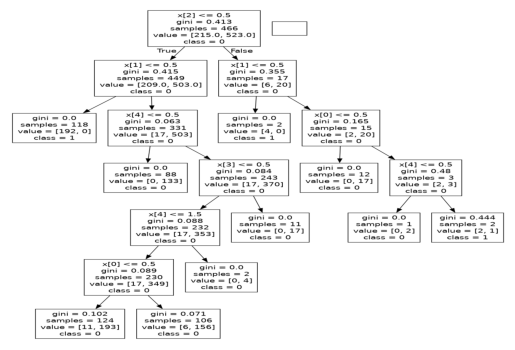

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the first tree
tree = clf.estimators_[0]
class_names = [str(name) for name in data[target_column].unique()]

# Export the tree with higher DPI
export_graphviz(tree, out_file='tree.dot', class_names=class_names)

# Create a pydotplus object and write PNG image
graph = pydotplus.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# Display the tree image with larger size
plt.imshow(plt.imread('tree.png'), extent=(0, 12, 0, 8))
plt.axis('off')
plt.show()